In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
import statistics

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rcParams['legend.title_fontsize'] = 'x-large' # fontsize of legend title
sns.set_style("white")

Import dataset

In [4]:
df = pd.read_csv("../OSC_dataset_metaanalysis.csv")

Make sure NFA and donor IDs are accurate (unique ID for each structure)

In [5]:
unique_NFAs_smi = []
unique_don_smi = []

NFA_ID = []
don_ID = []
pair_ID = []

for x in range(len(df)):
    canon_smi = Chem.MolToSmiles(Chem.MolFromSmiles(df['acc_SMILES_sidechains'][x]))
    canon_don_smi = Chem.MolToSmiles(Chem.MolFromSmiles(df['don_SMILES_sidechains'][x]))

    if canon_smi not in unique_NFAs_smi:
        unique_NFAs_smi.append(canon_smi)
    
    if canon_don_smi not in unique_don_smi:
        unique_don_smi.append(canon_don_smi)

    NFA_index = unique_NFAs_smi.index(canon_smi)
    NFA_ID.append(NFA_index)

    don_index = unique_don_smi.index(canon_don_smi)
    don_ID.append(don_index)

    pair_ID.append(f"{NFA_index}_{don_index}")
    
print('The number of unique NFAs with full side chains is: %s' % len(unique_NFAs_smi))
print('The number of unique donors with full side chains is: %s' % len(unique_don_smi))

The number of unique NFAs with full side chains is: 1082
The number of unique donors with full side chains is: 432


Make a filtered dataset that contains only unique pairs. The PCE should be for the highest performing pair.

In [6]:
# sort by highest PCE
df = df.sort_values("PCE_avg", ascending=False)

best_pair_IDs = []
pairs_to_drop = []
# take the first occurence of each unique pair (best PCE)
for x in range(len(df)):
    if df["pair_ID_updated"][x] not in best_pair_IDs:
        best_pair_IDs.append(df["pair_ID_updated"][x])
    else:
        pairs_to_drop.append(x)
    
# drop duplicate pairs (with lower PCE than the original)
df = df.drop(pairs_to_drop)

df.to_csv('OSC_dataset_unique_pairs.csv')


Plot distribution of NFA types

In [7]:
df = pd.read_csv("OSC_dataset_unique_pairs.csv")

There are 440 y-series NFA, 945 fused NFAs, and 264 unfused NFAs
The mean PCE for Y-series NFAs is 12.63, while the median PCE is 13.54
The mean PCE for Fused NFAs is 9.0, while the median PCE is 9.53
The mean PCE for Unfused NFAs is 8.18, while the median PCE is 8.96


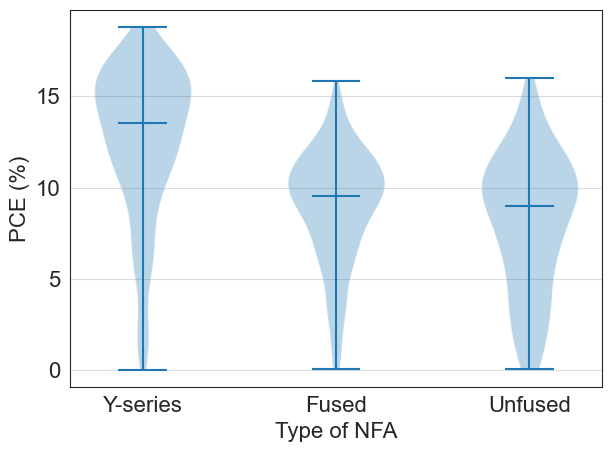

In [8]:
y_PCE = []
fused_PCE = []
unfused_PCE = []

for x in range(len(df)):
    if df["acceptor_class"][x] == "y":
        y_PCE.append(df["PCE_avg"][x])
    elif df["acceptor_class"][x] == "fused":
        fused_PCE.append(df["PCE_avg"][x])
    elif df["acceptor_class"][x] == "unfused":
        unfused_PCE.append(df["PCE_avg"][x])

print(f"There are {len(y_PCE)} y-series NFA, {len(fused_PCE)} fused NFAs, and {len(unfused_PCE)} unfused NFAs")

print(f"The mean PCE for Y-series NFAs is {round(statistics.mean(y_PCE), 2)}, while the median PCE is {round(statistics.median(y_PCE), 2)}")
print(f"The mean PCE for Fused NFAs is {round(statistics.mean(fused_PCE), 2)}, while the median PCE is {round(statistics.median(fused_PCE), 2)}")
print(f"The mean PCE for Unfused NFAs is {round(statistics.mean(unfused_PCE), 2)}, while the median PCE is {round(statistics.median(unfused_PCE), 2)}")

data = [y_PCE, fused_PCE, unfused_PCE]

# plot data
fig, ax = plt.subplots()

plt.violinplot(data, showmedians = True)

ax.set_ylabel('PCE (%)')
ax.set_xlabel('Type of NFA')

plt.tight_layout()

plt.grid(axis='y', alpha=0.7)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["Y-series", "Fused", "Unfused"])

#plt.savefig('NFA_type_violin.pdf', dpi=600)
plt.savefig('NFA_type_violin.png', dpi=600)

plt.show()